# A demonstration of oslo_method_python as of January 2019


Before this notebook is run on a new system, make sure to compile the Cython files by doing (in the top repo directory):

```python setup.py build_ext --inplace```

In [7]:
%load_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.insert(0,"../")
import oslo_method_python as om
import copy
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


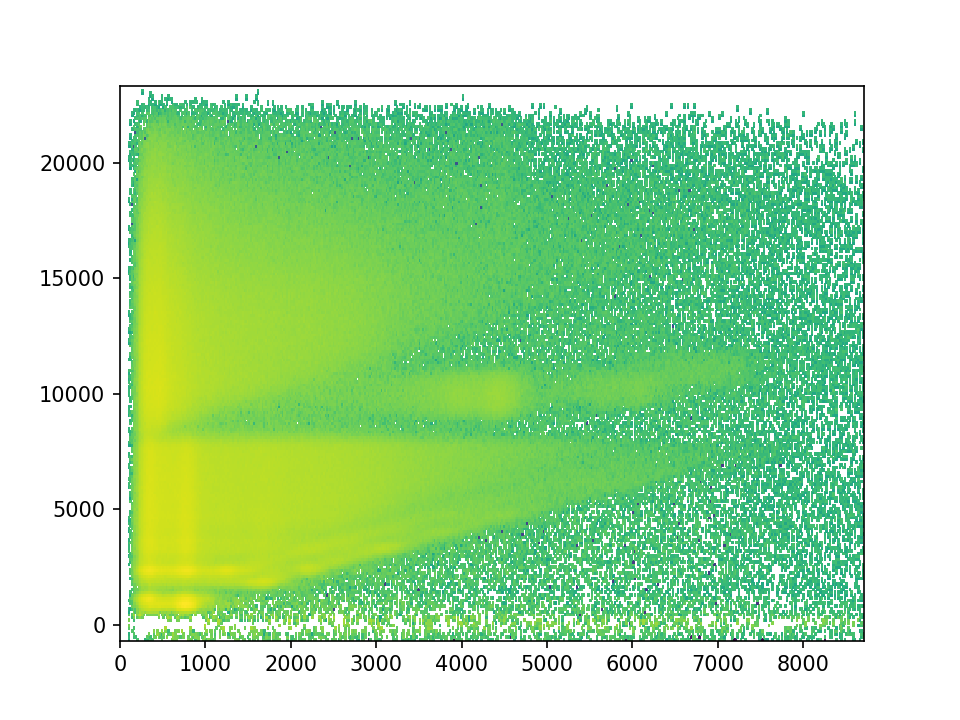

In [8]:
# Import raw matrix into instance of om.Matrix() and plot it
folderpath = "/home/jorgenem/MEGA/doktorgrad/oslometode_usikkerhetspropagering/Dy164/data/"
fname_raw = os.path.join(folderpath, "alfna")
raw = om.Matrix()
raw.load(fname_raw)
raw.plot()

<IPython.core.display.Javascript object>


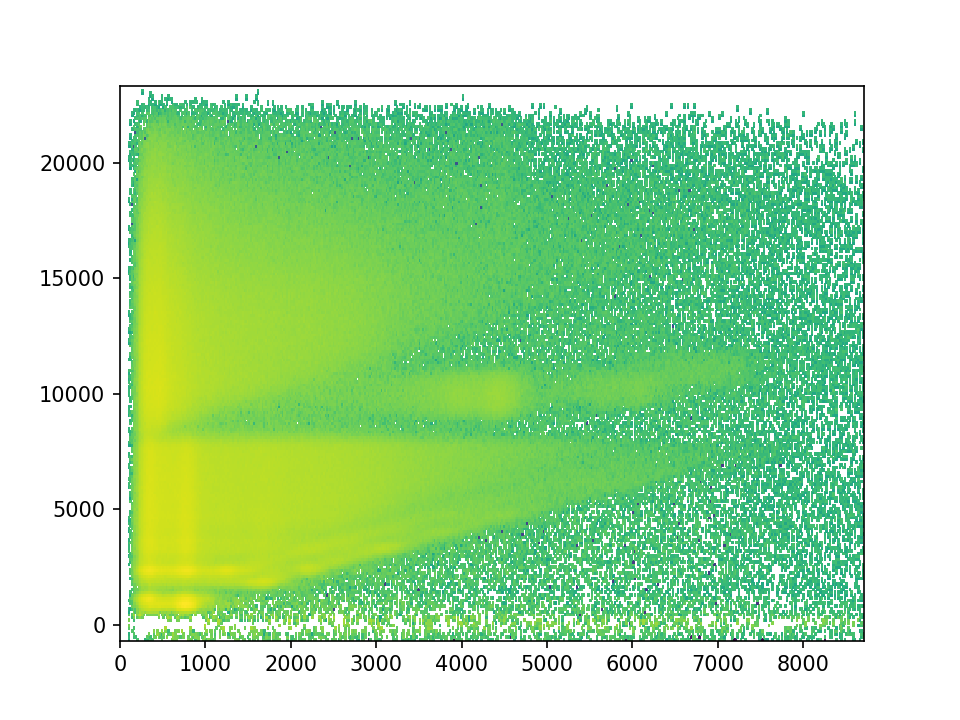

In [9]:
# Put it into an instance of om.MatrixAnalysis() to do unfolding and first generation method:
ma = om.MatrixAnalysis()
ma.raw = raw
ma.raw.plot()

Ex_max = 23300.0
[32 32 10 17 32 32 10 32 32 32 32 32 28 32 23 26 23  5 32 12 32 32 32 12
 32 29 17 32 28 10 10 13 32 16 32 13 32 32 32 32  9 11 32  9 32 32 25 10
  9 32 14  9  8  7  8 32  8  4  8  9  7 10 12 32 13  9 13 10 15 13 12 11
  8  6  8  8  6  8 32  9 32 32 11 14 14 20 14 13 14 13 17 14 14 12 11 11
 11 11 11 11 17 15 17 10 14 11  9  8  7  9 10  9  8 32  7  6  5  8  9  5
  6  8  7  4 32  4 10  5  5  6 32 20 10  5  5  7  5  9  4  6  6  6 32  4
 25  6 32 10 32  4 32  8 32 32 32 32 32 32 32  5 27  4 32  3 32 32  6  2
  3  4 10 32 23  4 20  3 13 18 11  5  3 23  2 18  1 14 32  8  1  1  0  0
  0  0  0  0  0  0  0  0]


<IPython.core.display.Javascript object>


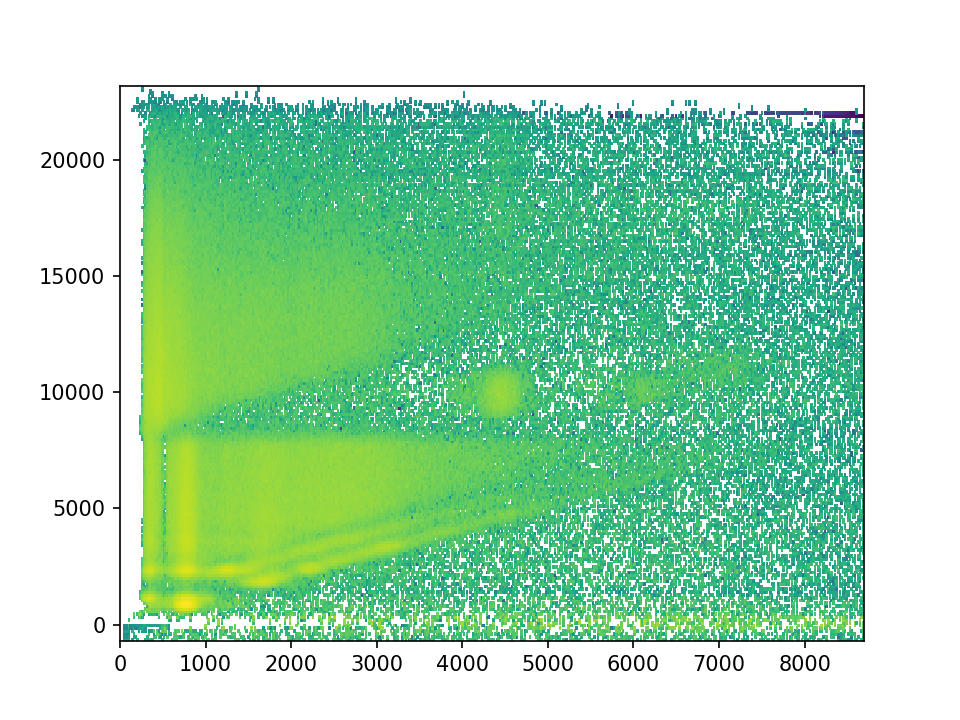

In [10]:
# Unfold the matrix. 
# I haven't implemented a fast enough routine for response function interpolation yet,
# so we have to load response functions with the right calibration, made by MAMA, from file.
fname_resp_mat = os.path.join(folderpath, "response_matrix.m")
fname_resp_dat = os.path.join(folderpath, "response_parameters.dat")

# Call the unfolding algorithm:
ma.unfold(fname_resp_dat=fname_resp_dat, fname_resp_mat=fname_resp_mat)
# The result is stored in the Matrix() instance ma.unfolded. Plot it:
ma.unfolded.plot()

0.0


<IPython.core.display.Javascript object>


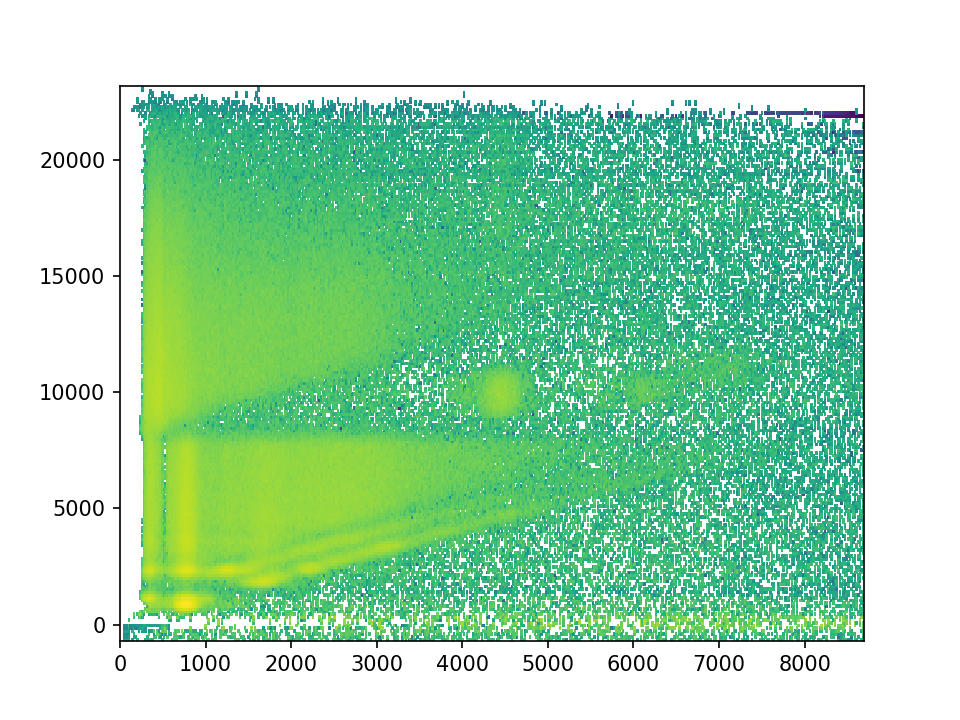

In [20]:
# Fill negative (this function requires debugging and improvements)
ma.unfolded.fill_negative(window_size=4)
print(ma.unfolded.matrix.min())
ma.unfolded.plot()

0.0


<IPython.core.display.Javascript object>


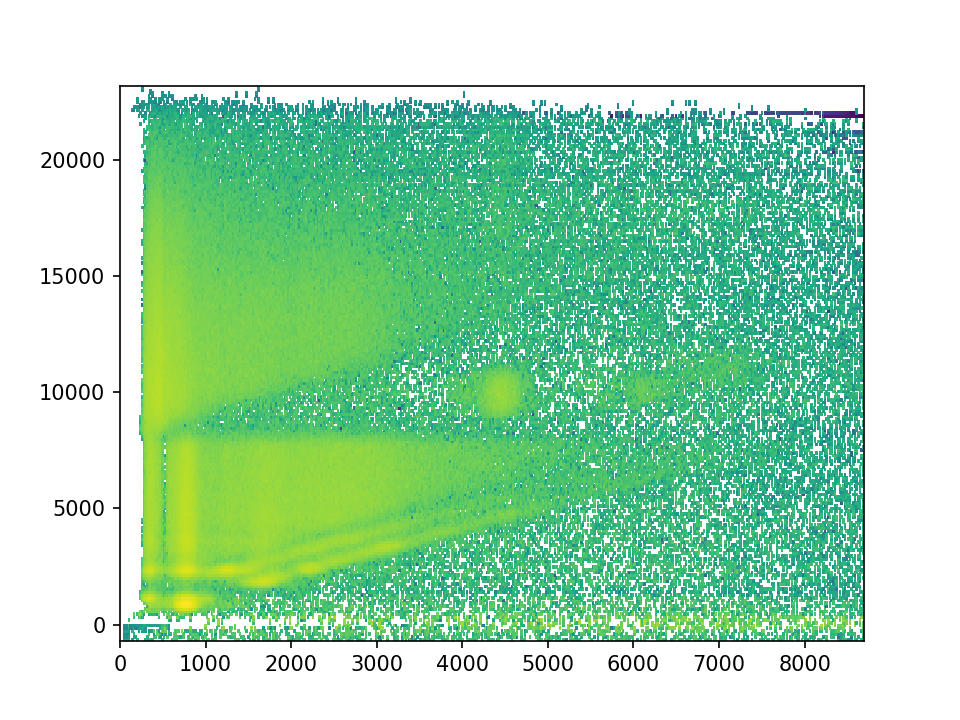

In [19]:
# Remove negatives remaining
ma.unfolded.remove_negative()
print(ma.unfolded.matrix.min())
ma.unfolded.plot()

iteration = 0 max_diff = 16569.026544758042
iteration = 1 max_diff = 99112.18436513595
iteration = 2 max_diff = 90830.58513822743
iteration = 3 max_diff = 3152.347784838387
iteration = 4 max_diff = 3020.2949824414463
iteration = 5 max_diff = 3803.474072222587
iteration = 6 max_diff = 3803.474072222587
iteration = 7 max_diff = 3803.474072222587
iteration = 8 max_diff = 3803.474072222587
iteration = 9 max_diff = 4139.386463834498
H.shape = (200, 450)
Ex_array.shape = (200,)
Egamma_array.shape = (450,)


<IPython.core.display.Javascript object>


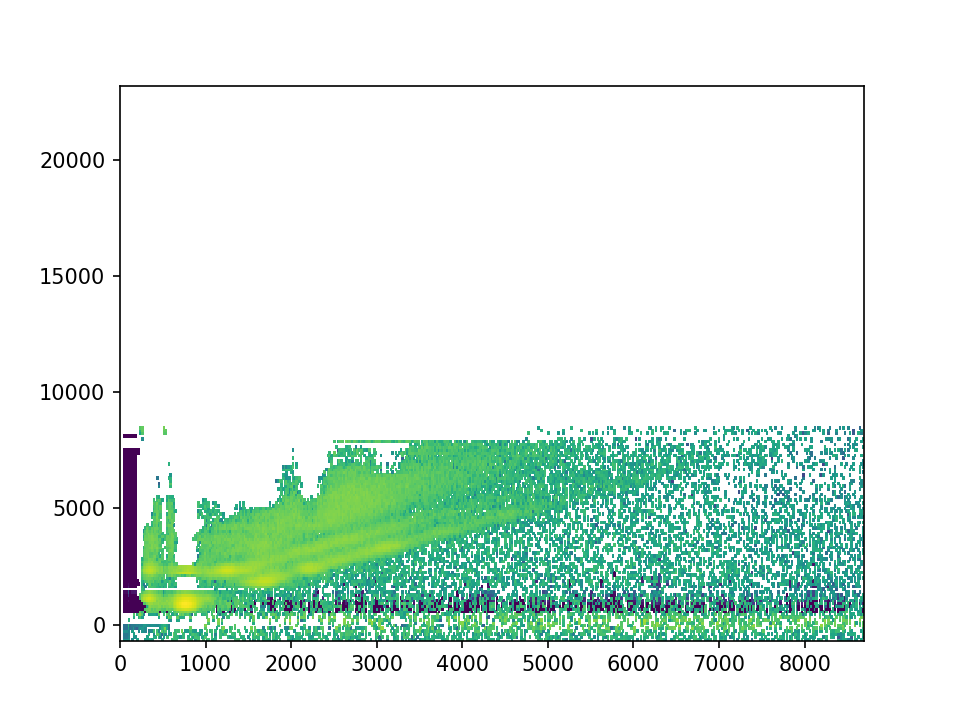

In [24]:
# Run first generation method
ma.first_generation_method(Ex_max = 8500, dE_gamma = 500)
ma.firstgen.plot(zmin=1e-3)

In [25]:
# Run fit to rho and T

bin_width_out = 120
Ex_min = 3000
Ex_max = 8000
Eg_min = 1000

rho, T = om.fit_rho_T(ma.firstgen, bin_width_out,
                      Ex_min, Ex_max, Eg_min)

../oslo_method_python/fit_rho_T.py:255: RuntimeWarning: overflow encountered in square
  chi2_matrix = div0((P_exp - P_fit)**2, P_err**2)


         Current function value: 431072537.769735
         Iterations: 1
         Function evaluations: 16428
         Gradient evaluations: 114
res =      fun: 431072537.7697352
     jac: array([ 2.995084e+06,  1.619472e+06,  2.475680e+06,  1.758892e+06,
        4.860240e+05, -1.106952e+06, -5.238328e+06, -1.949416e+06,
        7.543920e+05,  1.212236e+06, -5.417800e+05,  1.427360e+05,
       -1.371240e+05, -1.337172e+06, -1.130680e+05, -9.694560e+05,
        3.032400e+04, -7.652600e+05, -2.128188e+06, -4.793840e+05,
        3.055252e+06, -6.210440e+05,  3.330376e+06, -3.588480e+06,
       -1.444548e+06,  9.624000e+03,  3.600000e+02, -2.000000e+01,
       -2.800000e+01,  0.000000e+00,  4.800000e+01,  8.000000e+01,
        7.600000e+01,  4.400000e+01,  1.200000e+01,  2.400000e+01,
        5.200000e+01,  6.000000e+01,  5.200000e+01,  2.400000e+01,
        1.600000e+01,  2.000000e+01,  2.000000e+01,  2.000000e+01,
        1.600000e+01,  1.200000e+01,  1.200000e+01,  8.000000e+00,
       

../oslo_method_python/fit_rho_T.py:255: RuntimeWarning: overflow encountered in square
  chi2_matrix = div0((P_exp - P_fit)**2, P_err**2)


../oslo_method_python/fit_rho_T.py:255: RuntimeWarning: overflow encountered in square
  chi2_matrix = div0((P_exp - P_fit)**2, P_err**2)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:391: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
../oslo_method_python/fit_rho_T.py:255: RuntimeWarning: overflow encountered in square
  chi2_matrix = div0((P_exp - P_fit)**2, P_err**2)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Optimization terminated successfully.
         Current function value: nan
         Iterations: 1
         Function evaluations: 16128
         Gradient evaluations: 112
res =      fun: nan
     jac: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
 message: 'O

../oslo_method_python/fit_rho_T.py:255: RuntimeWarning: overflow encountered in square
  chi2_matrix = div0((P_exp - P_fit)**2, P_err**2)
../oslo_method_python/fit_rho_T.py:267: RuntimeWarning: overflow encountered in square
  + regularizer*(np.sum(rho_array**2) + np.sum(T_array**2)))
../oslo_method_python/fit_rho_T.py:267: RuntimeWarning: invalid value encountered in double_scalars
  + regularizer*(np.sum(rho_array**2) + np.sum(T_array**2)))
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<IPython.core.display.Javascript object>


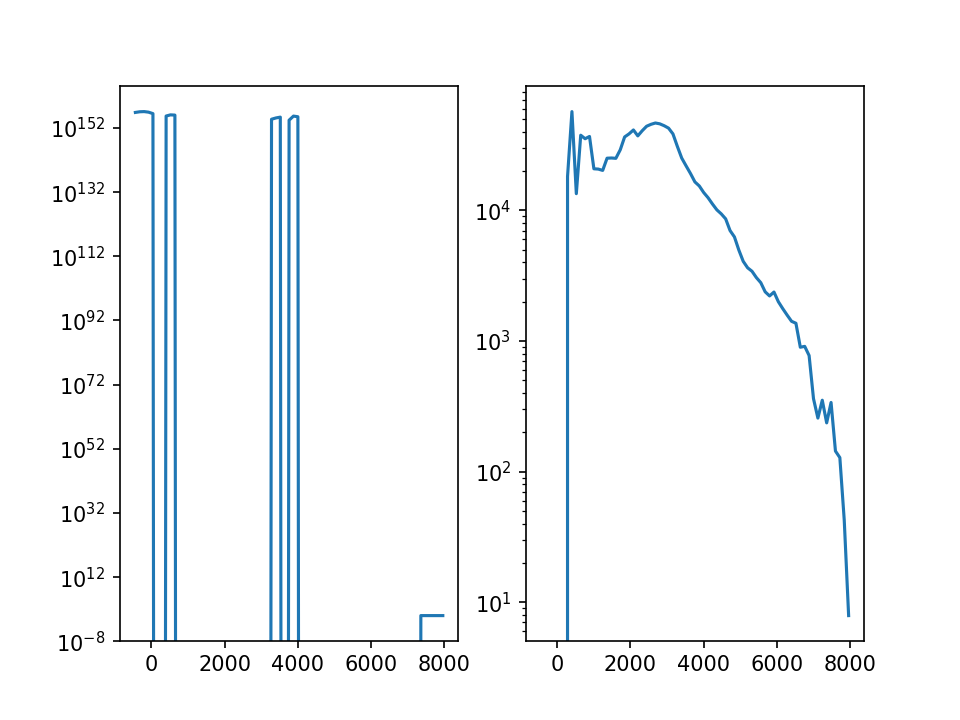

True

In [29]:
# Run fit to rho and T on MAMA-unfolded matrix instead

bin_width_out = 120
Ex_min = 3000
Ex_max = 8000
Eg_min = 1000

firstgen_mama = om.Matrix()
firstgen_mama.load(os.path.join(folderpath, "fg"))

rho, T = om.fit_rho_T(firstgen_mama, bin_width_out,
                      Ex_min, Ex_max, Eg_min)

f, (axrho, axT) = plt.subplots(1,2)
rho.plot(ax=axrho, yscale="log")
T.plot(ax=axT, yscale="log")